In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) # Mount google drive to load training and testing data


# This where all the Packages are cached instead or reinstalling them every new runtime
PACKAGES_DIR = '/content/drive/My Drive/Bachelor/pip_cache'

# This is where MERGED & PREPROCESSED & CLEANED Dataset is
PREPROCESSED_MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/PREPROCESSED_DATASET/'


# This is where the figures are saved
FIGURES_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/FIGURES/'


# Directory where the checkpoints will be saved for tensorflow models
TF_CHECKPOINT_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/tf/checkpoint/'

# Arabert
TF_ARABERT_CHECKPOINT_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/arabert/tf/checkpoint/'


# Directory where the tensorflow models will be saved 
TF_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/tf/model/'

# Arabert
TF_Arabert_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/tf/model/'


# Directory where the tensorflow logs will be saved 
TF_LOG_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/tf/log/'


  #########################################################################  PYTORCH ##########################################################

# Directory where the checkpoints will be saved for pytorch models
PY_CHECKPOINT_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/checkpoint/'
PY_ARABERT_CHECKPOINT_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/arabert/py/checkpoint/'


# Directory where the pytorch models will be saved 
PY_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/'
PY_ARABERT_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/models/arabert/py/model/'

# Number of Figures
FIGURE_COUNTS = 1


#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/abedkhooli/arabic-100k-reviews')

Mounted at /content/drive


# Packages

In [ ]:
!pip config set global.cache-dir /content/drive/My\ Drive/Bachelor/pip_cache



!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  transformers datasets
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  tensorflow
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  torchinfo
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  evaluate
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  pydot graphviz
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'  accelerate



# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar_wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' python-bidi
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic_reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic-reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' autokeras


from IPython.display import clear_output
clear_output() # clear output window

In [ ]:
%tensorflow_version 2.x
# Packages 
# types in python
from typing import List, Tuple ,Dict ,Any , Union
import time
import string
import os
import random



from collections import Counter

# -- Arabic text dependencies
# from arabic_reshaper import reshape      # pip install arabic_reshaper
# from bidi.algorithm import get_display   # pip install python-bidi
# from ar_wordcloud import ArabicWordCloud




# Data Manipulating  & Preprocessing packages
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import unicodedata # normlization of arabic letters encoding to be unicoded 
import pandas as pd
pd.set_option('display.max_colwidth', None) # Setting the display option to show the full width of columns in pandas dataframe.




# Model
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from transformers import pipeline
import torch
#from autokeras import StructuredDataClassifier



# Metrics
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve
import evaluate

 
#import warnings
#warnings.simplefilter(action='ignore')
#warnings.filterwarnings("ignore")

# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42



def set_seed(seed=42):
  RANDOM_SEED=seed
  RANDOM_STATE=seed
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False



# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Deep Learning

## Embeddings

### CBOW (Continuous Bag of Words)
CBOW (Continuous Bag of Words) is a neural network model that predicts a target word based on the context words surrounding it. CBOW is faster to train and tends to work well with small datasets. CBOW embeddings can capture the overall meaning of a sentence or a paragraph, making them useful for sentiment analysis tasks that require understanding the sentiment of a whole text.

### Skip-gram
Skip-gram, on the other hand, is a neural network model that predicts the context words surrounding a target word. Skip-gram is slower to train but tends to work better with larger datasets. Skip-gram embeddings can capture more nuanced relationships between words, making them useful for sentiment analysis tasks that require understanding the sentiment of specific words or phrases within a text.

# Deep Learning with AutoKeras
>It uses a process of searching through neural network architectures to best address a modeling task, referred to more generally as Neural Architecture Search

# Transformers

> we will define general constants for both Tensorflow(Static Computation graph) and Pytorch(Dynamic Computation Graph)

#### Constants

In [ ]:
# CONSTANTS

# batch size 
BATCH_SIZE=16

# number of epochs
EPOCHS=10

# max length of sequences
MAX_LEN=180

# Learning Rate of the optimizers
LEARNING_RATE=5e-5



#### Metrics

In [ ]:
from datasets import load_metric
import evaluate
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

# def compute_metrics(logits_and_labels:Tuple[np.ndarray, np.ndarray]) -> Dict[str, Any]:
#   """
#   Compute the metrics:
#   f1-score
#   accuracy
#   """
#   metric=load_metric('glue','sst2')
#   logits,labels=logits_and_labels
#   predictions=np.argmax(logits,axis=-1)
#   # accuracy=np.mean(predictions==labels)
#   # f1=f1_score(labels,predictions,average='macro')
#   return metric.compute(predictions=predictions,refrences=labels)
#   #return {'accuracy':accuracy,'f1':f1}




def compute_metrics(eval_preds:Tuple[np.ndarray, np.ndarray]) -> Dict[str, Any]:
  """  called each time the model is evaluated on the validation dataset
        @returns a dictionary of metrics such as accuracy(glu) , acc_score , F1 score, precision,recall,roc_score and auc_score."""
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  # f1-score
  f1_macro = f1_score(labels, predictions, average='macro')
  f1_weighted = f1_score(labels, predictions, average='weighted')
  # precision
  precision_macro = precision_score(labels, predictions, average='macro')
  precision_weighted = precision_score(labels, predictions, average='weighted')
  # recall
  recall_macro = recall_score(labels, predictions, average='macro')
  recall_weighted = recall_score(labels, predictions, average='weighted')

  #acc_score=accuracy_score(labels,predictions)
  
  metric = evaluate.load("glue", "sst2")
  metrics = metric.compute(predictions=predictions, references=labels)
  metrics.update({
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision_macro": precision_macro,
        "precision_weighted": precision_weighted,
        "recall_macro": recall_macro,
        "recall_weighted": recall_weighted,
      #  'accuracy_score':acc_score
        })
  return metrics




## Transformers using Pytorch

### Packages

In [ ]:
from datasets import load_dataset, load_metric
from transformers import AutoConfig,AutoTokenizer,TFAutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback,AutoModelForSequenceClassification
import torch
import os

### Clear Previous Sessions

In [ ]:
from keras.backend import clear_session # clears the current Keras session and frees up memory.
clear_session()

# set the maximum split size to 512 MB
max_split_size_mb = 512

# set the environment variable
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = f'max_split_size={max_split_size_mb}'

# Clear PyTorch cache (if using a GPU)
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Delete existing PyTorch models or variables

model = 'dummy'
optimizer= 'dummy'
tokenizer='dummy'
trainer='dummy'
del model, optimizer,tokenizer,trainer


### Callbacks

In [ ]:
from transformers import EarlyStoppingCallback, IntervalStrategy, get_scheduler

# Define EarlyStoppingCallback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.01)

# # Define CheckpointCallback
# checkpoint_callback = ModelCheckpoint(
#     dirpath=PY_CHECKPOINT_DIR,
#     filename='checkpoint-{epoch:02d}-{val_loss:.2f}',
#     save_top_k=3,
#     monitor='val_loss',
#     mode='min'
# )


PY_CALLBACKS = [early_stopping_callback]

In [ ]:
#  check if your system has a compatible NVIDIA G
print(torch.cuda.is_available())

True


### My Preprocessed Labeled Dataset
> Consists of Egyptian and Modern Standard Arabic (MSA) .

> 
```
{'LABEL': Value(dtype='int64', id=None),
 'TWEET': Value(dtype='string', id=None)}
```
> Label explaination :

```
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
   } 
```

In [ ]:
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
}

In [ ]:
# Dataset names 
TRAIN_DATASET_NAME='TRAIN_DATASET'
VALIDDATION_DATASET_NAME='VALIDATION_DATASET'
TEST_DATASET_NAME='TEST_DATASET'

data_files = {"train": f"{PREPROCESSED_MERGED_DATASET_DIR + TRAIN_DATASET_NAME}.csv",
              'validation':f'{PREPROCESSED_MERGED_DATASET_DIR+VALIDDATION_DATASET_NAME}.csv',
              "test": f"{PREPROCESSED_MERGED_DATASET_DIR +TEST_DATASET_NAME}.csv",
              }

In [ ]:
#To delete cached datasets
import os

cache_dir = "~/.cache/huggingface/datasets"
os.system(f"rm -rf {cache_dir}/*")

0

In [ ]:
# Load the dataset
dataset=load_dataset( 'csv',data_files=data_files,name='dataset')

dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/dataset-57c4bb00714910fc/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['LABEL', 'TWEET'],
        num_rows: 51483
    })
    validation: Dataset({
        features: ['LABEL', 'TWEET'],
        num_rows: 6435
    })
    test: Dataset({
        features: ['LABEL', 'TWEET'],
        num_rows: 6436
    })
})

In [ ]:
# explore Features
dataset['train'].features

{'LABEL': Value(dtype='int64', id=None),
 'TWEET': Value(dtype='string', id=None)}

In [ ]:
pd.DataFrame(dataset['train']).sample(5)

,LABEL,TWEET
47250,2,ماليز ليهاخ اخيهمقال يوم شروق عرض هجوم مهاتير محمد استخدام شعار دين انتخاب
32748,0,اعجب كتاب فهو تحدث اسطور رجب طيب اردوغ بلس مقرب مالوم عل عل كاتب اطال عده جوانب مش تهم قاريء امكان اختصار
32715,1,حب سيس ايه بيع تيران صنافير ام شله داخل خارج ام موافق اثيوب ناء سد نهض
32012,1,مجرم افروف قول همه اوضاع انس حلب تقديم مساعد توقف ثرثر
41154,1,معرض تاب عبار شباب اشخ مسو مثقف اشخ مسو مثقف ينم اول يب يب توقيع اتب


#### Data Collator

> Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept

In [ ]:
from typing import Dict, Tuple
from torch.utils.data import DataLoader, Dataset,RandomSampler,SequentialSampler

def data_loader(tokenized_datasets: Dict[str, Dataset], PY_DATA_COLLATOR) -> Tuple[DataLoader, DataLoader, DataLoader]:
  # randomly samples elements from a dataset without replacement
  train_sampler = RandomSampler(tokenized_datasets["train"])
  train_dataloader = DataLoader(
      tokenized_datasets["train"], sampler=train_sampler, shuffle=True, batch_size=BATCH_SIZE, collate_fn=PY_DATA_COLLATOR
  )
  # samples elements from a given sequence in a sequential order
  eval_sampler = SequentialSampler(tokenized_datasets["validation"])
  eval_dataloader = DataLoader(
      tokenized_datasets["validation"], sampler=eval_sampler, batch_size=BATCH_SIZE, collate_fn=PY_DATA_COLLATOR
  )
  # samples elements from a given sequence in a sequential order
  test_sampler = SequentialSampler(tokenized_datasets["test"])

  test_dataloader = DataLoader(
      tokenized_datasets["test"],sampler=test_sampler, batch_size=BATCH_SIZE, collate_fn=PY_DATA_COLLATOR
  )
  return train_dataloader , eval_dataloader ,test_dataloader

#### Model Initialization

In [ ]:
def model_init(model_huggingface_checkpoint:str,num_labels:int):
    """ Intializing the Model and connecting it to available GPU or CPU"""
    model= AutoModelForSequenceClassification.from_pretrained(model_huggingface_checkpoint,  num_labels=num_labels)
        # Wrap model in DataParallel if multiple GPUs are available
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs")
        model = torch.nn.DataParallel(model)
    # If there's a GPU available...
    if torch.cuda.is_available():    

        # Tell PyTorch to use the GPU.    
        device = torch.device("cuda")

        print('There are %d GPU(s) available.' % torch.cuda.device_count())

        print('We will use the GPU:', torch.cuda.get_device_name(0))
        !nvidia-smi

    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    model.to(device)
    return model


### CAMEL BERT

In [ ]:
model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment'

#### Camel-BERT Subword Tokenization

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(model_huggingface_checkpoint)

In [ ]:
def tokenize_function(example:Dict[str, Any]) -> Dict[str, Union[List[int], Any]]:
  """
  takes a dictionary (like the items of our dataset) 
  it does subword tokenization
  truncate to length 180
  we wont do padding here we will do it with DataCollator with Padding (for Bucket Batching)
  add special tokens
  convert tokens to ids
  @returns a new dictionary with the keys input_ids, attention_mask
  """
  return tokenizer(example["TWEET"], truncation=True,max_length=MAX_LEN)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function,
                                 batched=True,
                                 remove_columns=['TWEET'],# columns will be removed before updating the examples with the output of `function`
                                 disable_nullable=True,
                                 num_proc=2
                                 )
tokenized_datasets

Map (num_proc=2):   0%|          | 0/51483 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/6435 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/6436 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 51483
    })
    validation: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6435
    })
    test: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6436
    })
})

In [ ]:
# removing unecessary columns
tokenized_datasets = tokenized_datasets.rename_column("LABEL", "labels")


# reformat it for PYTORCH
tokenized_datasets.set_format("torch")

tokenized_datasets["train"].column_names

['labels', 'input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader , eval_dataloader ,test_dataloader = data_loader(tokenized_datasets,PY_DATA_COLLATOR)

In [ ]:
# To quickly check there is no mistake in the data processing, we can inspect a batch like this:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([32]),
 'input_ids': torch.Size([32, 104]),
 'token_type_ids': torch.Size([32, 104]),
 'attention_mask': torch.Size([32, 104])}

#### Configuring the Model

In [ ]:
# from tqdm.auto import tqdm
# from accelerate import Accelerator

# accelerator = Accelerator()
# train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(
#      train_dataloader, eval_dataloader, model, optimizer
#  )

# progress_bar = tqdm(range(num_training_steps))


# for epoch in range(EPOCHS):
#     model.train()
#     for batch in train_dataloader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         loss = outputs.loss
#         loss.backward()

#         optimizer.step()
#         lr_scheduler.step()
#         optimizer.zero_grad()
#         progress_bar.update(1)

In [ ]:
# import evaluate

# metric = evaluate.load("glue", "sst2")
# model.eval()
# for batch in eval_dataloader:
#     batch = {k: v.to(device) for k, v in batch.items()}
#     with torch.no_grad():
#         outputs = model(**batch)

#     logits = outputs.logits
#     predictions = torch.argmax(logits, dim=-1)
#     metric.add_batch(predictions=predictions, references=batch["labels"])

# metric.compute()

In [ ]:
#model.save_pretrained(PY_MODEL_DIR+'camel_model')

In [ ]:
# def predict_sentiment(input):
#   input=clean_text(input)
#   model_input=tokenizer.texts_to_sequences(input)
#   model_input=pad_sequences(model_input, padding='post', maxlen=300)
#   pred = model.predict(model_input, verbose=True)
#   pred=pred.reshape(pred.shape[0],)[0]
#   if(pred>0.5): return "Satisfied",pred
#   return "Unsatisfied",pred
 

#### Training

In [ ]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with same weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 1.0, 1.0]))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
model= AutoModelForSequenceClassification.from_pretrained(model_huggingface_checkpoint,return_dict=True,  num_labels=3)
if torch.cuda.device_count() > 1:
  print("Using", torch.cuda.device_count(), "GPUs")
  # Wrap model in DataParallel if multiple GPUs are available
  model = torch.nn.DataParallel(model)
    # If there's a GPU available...
if torch.cuda.is_available():    

        # Tell PyTorch to use the GPU.    
  device = torch.device("cuda")

  print('There are %d GPU(s) available.' % torch.cuda.device_count())

  print('We will use the GPU:', torch.cuda.get_device_name(0))
  !nvidia-smi

    # If not...
else:
  print('No GPU available, using the CPU instead.')
  device = torch.device("cpu")
  model.to(device)


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Mon Apr  3 00:27:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

num_training_steps = EPOCHS * len(train_dataloader)

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

16090


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_MODEL_DIR}checkpoint-*

ls: cannot access '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/checkpoint-*': No such file or directory


In [ ]:
# To make sure that everything will go smoothly during training, we pass our batch to this model:
# print(f"number of labels : {model.num_labels}")
# outputs = trainer.model(**batch)
# print(outputs.loss, outputs.logits.shape)
# torch.Size([16, 3]
# means for every sample in 16 samples we have 3 logits

In [ ]:
# Trainer Configurations
from transformers import  TrainingArguments, Trainer , AdamW ,get_linear_schedule_with_warmup

# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*EPOCHS)
checkpoint_path = os.path.join(PY_MODEL_DIR,"checkpoint-21840")

training_args = TrainingArguments(
    run_name=f'camel_egyptian',
    do_eval = True, # evaluation will be performed after each epoch of training
    adam_epsilon = 1e-8,
    output_dir=PY_MODEL_DIR,
    overwrite_output_dir=True,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=0,
    learning_rate=LEARNING_RATE,
    load_best_model_at_end=True,
    label_names=['labels'], #     The list of keys in your dictionary of inputs that correspond to the labels.
    weight_decay=0.01,
    metric_for_best_model = 'f1_macro',
   # metric_for_best_model='eval_loss',# use eval_loss to evaluate the best model pecify the metric to use to compare two different models. Must be the name of a metric returned by the evaluation with or without the prefix `"eval_"`
    greater_is_better=True,          # - `False` if `metric_for_best_model` is not set, or set to `"loss"` or `"eval_loss"`.
    group_by_length =True, #  Whether or not to group together samples of roughly the same length in the training dataset (to minimize padding applied and be more efficient). Only useful if applying dynamic padding.
   # resume_from_checkpoint=checkpoint, # The path to a folder with a valid checkpoint for your model,
    push_to_hub=False,
    resume_from_checkpoint=None,
    seed = 25
)
 
set_seed(training_args.seed)
training_args = training_args.set_dataloader(
                                    train_batch_size=BATCH_SIZE,
                                    drop_last=True,# to drop the last incomplete batch
                                    auto_find_batch_size =True, # Whether to find a batch size that will fit into memory automatically through exponential decay, avoiding CUDA Out-of-Memory errors. Requires accelerate to be installed (`pip install accelerate`)
                                    eval_batch_size=BATCH_SIZE)

# Instantiate Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    optimizers=(optimizer,lr_scheduler),
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    callbacks=PY_CALLBACKS,
    compute_metrics=compute_metrics,
    data_collator=PY_DATA_COLLATOR,     # data collator
)



In [ ]:
from torchinfo import summary
summary(trainer.model)

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              23,040,000
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           2,307
Total params: 10

In [ ]:
# Check if the model trained for the specified number of epochs
if  os.path.exists(PY_MODEL_DIR + "saved_camel_pytorch_model"):
    print("Model trained for the specified number of epochs.")
else:
    print("Model did not train for the specified number of epochs.")
    trainer.train()

#trainer.train()

Model did not train for the specified number of epochs.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted
1,0.589300,0.571483,0.773632,0.773233,0.773272,0.773616,0.773604,0.773541,0.773632
2,0.428300,0.605416,0.768501,0.767074,0.767136,0.773242,0.773122,0.768261,0.768501
3,0.268100,0.707508,0.775187,0.773688,0.773700,0.778165,0.778221,0.775216,0.775187
4,0.177000,0.892533,0.777674,0.777292,0.777313,0.778633,0.778712,0.777713,0.777674


In [ ]:
if not os.path.exists(PY_MODEL_DIR + "saved_camel_pytorch_model"):
  print('Saving model and tokenizer')
  trainer.save_model(PY_MODEL_DIR + "saved_camel_pytorch_model")
  tokenizer.save_pretrained(PY_MODEL_DIR + "saved_camel_pytorch_tokenizer")
else:
    print(f'model and tokenizer were already precomputed and saved in {PY_MODEL_DIR}')


Saving model and tokenizer


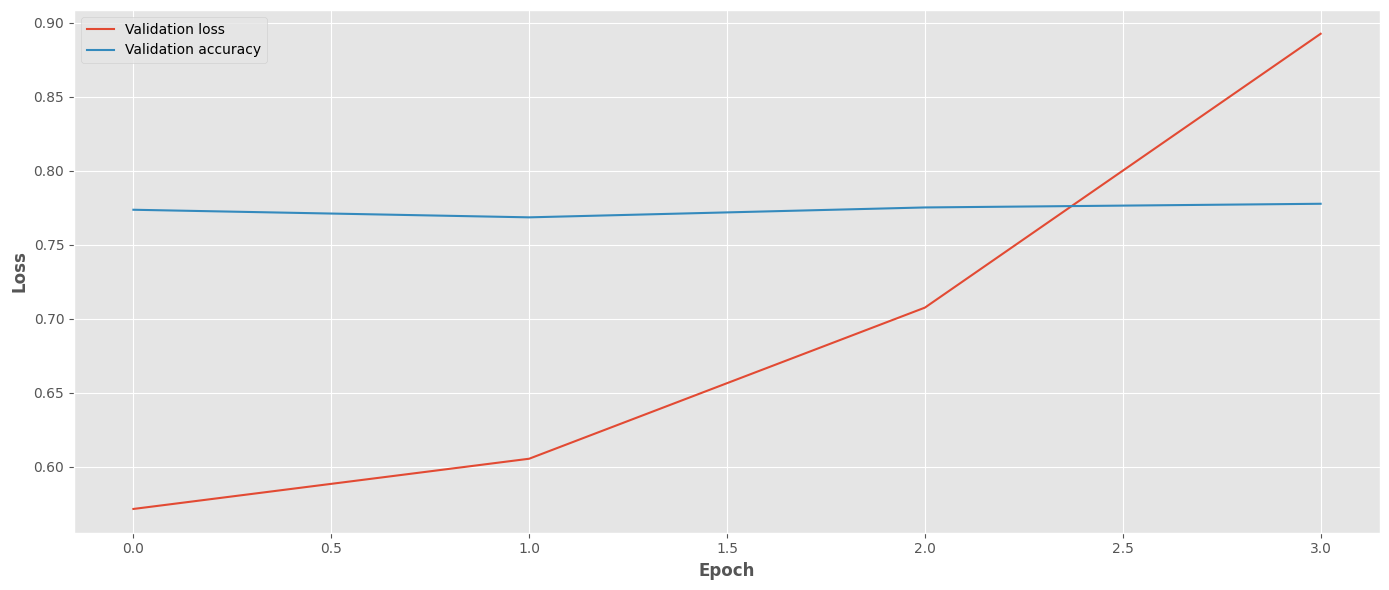

In [ ]:
# plot the training and validation loss/metrics over epochs
import matplotlib.pyplot as plt


train_history = trainer.state.log_history

# `train_history` is a list of dictionaries containing the training history
# including the loss and other metrics
train_loss = [x['loss'] for x in train_history if 'loss' in x and 'eval_loss' in x]
eval_accuracy = [x['eval_accuracy'] for x in train_history if 'eval_accuracy' in x]
eval_loss = [x['eval_loss'] for x in train_history if 'eval_loss' in x]



# Plot the loss curves
plt.plot(eval_loss, label='Validation loss')

plt.plot(eval_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# evaluate the model on the test dataset
# if trainer.state.epochs:
#   result = trainer.evaluate(tokenized_datasets['test'])
#   print(f'evaulatuin loss : {result["eval_loss"]}  , evaluation accuracy:{result["eval_accuracy"]}')

#### loading pipeline

In [ ]:
from transformers import pipeline
newmodel=pipeline('sentiment-analysis',
                  model=os.path.join(PY_MODEL_DIR+'saved_camel_pytorch_model'),
                  tokenizer=os.path.join(PY_MODEL_DIR + "saved_camel_pytorch_tokenizer"),
                  device=0)

In [ ]:
newmodel("ياخي بقى")

[{'label': 'negative', 'score': 0.986017644405365}]

In [ ]:
loss, accuracy = newmodel.evaluate(tokenized_datasets['test'], verbose=2)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'TextClassificationPipeline' object has no attribute 'evaluate'

In [ ]:
import evaluate
preds = model.predict(tokenized_datasets['test'])["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=tokenized_datasets["test"]["labels"])



### ARABERT

In [ ]:
arabert_huggingface_checkpoint='aubmindlab/bert-base-arabert'

#### Arab-BERT Subword Tokenization

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(arabert_huggingface_checkpoint)

In [ ]:
def tokenize_function(example:Dict[str, Any]) -> Dict[str, Union[List[int], Any]]:
  """
  takes a dictionary (like the items of our dataset) 
  it does subword tokenization
  truncate to length 180
  we wont do padding here we will do it with DataCollator with Padding (for Bucket Batching)
  add special tokens
  convert tokens to ids
  @returns a new dictionary with the keys input_ids, attention_mask
  """
  return tokenizer(example["TWEET"], truncation=True,max_length=MAX_LEN)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function,
                                 batched=True,
                                 remove_columns=['TWEET'],# columns will be removed before updating the examples with the output of `function`
                                 disable_nullable=True,
                                 num_proc=2
                                 )
tokenized_datasets

Map (num_proc=2):   0%|          | 0/51483 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/6435 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/6436 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 51483
    })
    validation: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6435
    })
    test: Dataset({
        features: ['LABEL', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6436
    })
})

In [ ]:
# removing unecessary columns
tokenized_datasets = tokenized_datasets.rename_column("LABEL", "labels")


# reformat it for PYTORCH
tokenized_datasets.set_format("torch")

tokenized_datasets["train"].column_names

['labels', 'input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
PY_DATA_COLLATOR = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader , eval_dataloader ,test_dataloader = data_loader(tokenized_datasets,PY_DATA_COLLATOR)

In [ ]:
# To quickly check there is no mistake in the data processing, we can inspect a batch like this:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([16]),
 'input_ids': torch.Size([16, 150]),
 'token_type_ids': torch.Size([16, 150]),
 'attention_mask': torch.Size([16, 150])}

#### Configuring the Model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    arabert_huggingface_checkpoint,
    num_labels=3,
    return_dict=True
)
print(model.config)

if torch.cuda.device_count() > 1:
  print("Using", torch.cuda.device_count(), "GPUs")
  # Wrap model in DataParallel if multiple GPUs are available
  model = torch.nn.DataParallel(model)
    # If there's a GPU available...
    
if torch.cuda.is_available():    
        # Tell PyTorch to use the GPU.    
  !nvidia-smi
  device = torch.device("cuda")
  print('There are %d GPU(s) available.' % torch.cuda.device_count())
  print('We will use the GPU:', torch.cuda.get_device_name(0))

    # If not...
else:
  print('No GPU available, using the CPU instead.')
  device = torch.device("cpu")


model.to(device)



In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

num_training_steps = EPOCHS * len(train_dataloader)

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

32180


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# To make sure that everything will go smoothly during training, we pass our batch to this model:
# print(f"number of labels : {model.num_labels}")
# outputs = model(**batch)
# print(outputs.loss, outputs.logits.shape)
# print( outputs.logits)
# torch.Size([16, 3]
# means for every sample in 16 samples we have 3 logits

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              49,152,000
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           2,307
Total params: 13

#### Training

In [ ]:
%%writefile CustomTrainer.py

from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        device = self.args.device
        weight = torch.tensor([1.0, 1.0, 1.0]).to(device)
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with same weights)
        loss_fct = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

Writing labr.py


In [ ]:
# Trainer Configurations
from transformers import  TrainingArguments, Trainer , AdamW ,get_linear_schedule_with_warmup

# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*EPOCHS)
#checkpoint_path = os.path.join(PY_MODEL_DIR,"checkpoint-21840")

training_args = TrainingArguments(
    run_name='arabert_egyptian',
    do_eval = True, # evaluation will be performed after each epoch of training
    adam_epsilon = 1e-8,
    output_dir=PY_ARABERT_MODEL_DIR,
    overwrite_output_dir=True,
    evaluation_strategy='epoch',
    save_strategy='epoch',
        save_total_limit=5, # save last 5 checkpoints

    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=0,
    learning_rate=LEARNING_RATE,
    load_best_model_at_end=True,
    label_names=['labels'], #     The list of keys in your dictionary of inputs that correspond to the labels.
    weight_decay=0.01,
    metric_for_best_model = 'f1_macro',
   # metric_for_best_model='eval_loss',# use eval_loss to evaluate the best model pecify the metric to use to compare two different models. Must be the name of a metric returned by the evaluation with or without the prefix `"eval_"`
    greater_is_better=True,          # - `False` if `metric_for_best_model` is not set, or set to `"loss"` or `"eval_loss"`.
    group_by_length =True, #  Whether or not to group together samples of roughly the same length in the training dataset (to minimize padding applied and be more efficient). Only useful if applying dynamic padding.
   # resume_from_checkpoint=checkpoint, # The path to a folder with a valid checkpoint for your model,
    push_to_hub=False,
    resume_from_checkpoint=None,
    seed = 25
)
 
set_seed(training_args.seed)
training_args = training_args.set_dataloader(
                                    train_batch_size=BATCH_SIZE,
                                    drop_last=True,# to drop the last incomplete batch
                                    auto_find_batch_size =True, # Whether to find a batch size that will fit into memory automatically through exponential decay, avoiding CUDA Out-of-Memory errors. Requires accelerate to be installed (`pip install accelerate`)
                                    eval_batch_size=BATCH_SIZE)

# Instantiate Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    optimizers=(optimizer,lr_scheduler),
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    callbacks=PY_CALLBACKS,
    compute_metrics=compute_metrics,
    data_collator=PY_DATA_COLLATOR,     # data collator
)



In [ ]:
# The most recent checkpoint file will be listed at the top.
!ls -lt {PY_ARABERT_MODEL_DIR}checkpoint-*

ls: cannot access '/content/drive/MyDrive/Bachelor/Sentiment/models/arabert/py/model/checkpoint-*': No such file or directory


In [ ]:
# Trainer Configurations
from transformers import  TrainingArguments , AdamW ,get_linear_schedule_with_warmup

# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*EPOCHS)
#checkpoint = os.path.join(PY_MODEL_DIR,"checkpoint-21840")

training_args = TrainingArguments(
    run_name='ARABERT_egyptian',
    output_dir=PY_ARABERT_MODEL_DIR,
    overwrite_output_dir=True,
    save_total_limit=5, # save last 5 checkpoints
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    load_best_model_at_end=True,     # load the best model when training ends
    warmup_steps=0,
    learning_rate=LEARNING_RATE,
    #label_names=['labels'], #     The list of keys in your dictionary of inputs that correspond to the labels.
    weight_decay=0.01,
    metric_for_best_model='eval_loss',# use eval_loss to evaluate the best model pecify the metric to use to compare two different models. Must be the name of a metric returned by the evaluation with or without the prefix `"eval_"`
    greater_is_better=False,          # - `False` if `metric_for_best_model` is not set, or set to `"loss"` or `"eval_loss"`.
    group_by_length =True, #  Whether or not to group together samples of roughly the same length in the training dataset (to minimize padding applied and be more efficient). Only useful if applying dynamic padding.
    #resume_from_checkpoint=checkpoint, # The path to a folder with a valid checkpoint for your model,
    push_to_hub=False,
    #resume_from_checkpoint=None

)
 
training_args = training_args.set_dataloader(
                                    train_batch_size=BATCH_SIZE,
                                    drop_last=True,# to drop the last incomplete batch
                                    auto_find_batch_size =False, # Whether to find a batch size that will fit into memory automatically through exponential decay, avoiding CUDA Out-of-Memory errors. Requires accelerate to be installed (`pip install accelerate`)
                                    eval_batch_size=BATCH_SIZE)


# Instantiate Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    callbacks=PY_CALLBACKS,
    compute_metrics=compute_metrics,
    data_collator=PY_DATA_COLLATOR,     # data collator
)
print(tokenized_datasets['train'])


Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 51483
})


In [ ]:
# Check if the model trained for the specified number of epochs
if  os.path.exists(PY_MODEL_DIR + "saved_arabert_pytorch_model"):
    print(f"Model trained for the specified number of epochs {EPOCHS}.")

trainer.train(resume_from_checkpoint=False)
#trainer.train()

Model trained for the specified number of epochs 10.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted
1,0.642200,0.656016,0.758706,0.758572,0.758596,0.760127,0.760217,0.758751,0.758706
2,0.503300,0.650272,0.759017,0.756493,0.756511,0.769819,0.769948,0.759118,0.759017
3,0.381600,0.755805,0.772388,0.772602,0.772628,0.773806,0.773874,0.772400,0.772388
4,0.267700,0.885987,0.762749,0.761430,0.761449,0.764315,0.764332,0.762723,0.762749
5,0.228900,1.030280,0.766480,0.765803,0.765846,0.767546,0.767490,0.766339,0.766480
6,0.165600,1.174763,0.769590,0.769991,0.770028,0.771265,0.771332,0.769580,0.769590


TrainOutput(global_step=19302, training_loss=0.35234857368884265, metrics={'train_runtime': 2673.909, 'train_samples_per_second': 192.538, 'train_steps_per_second': 12.031, 'total_flos': 3850352421265728.0, 'train_loss': 0.35234857368884265, 'epoch': 6.0})

In [ ]:
print('Saving model and tokenizer')
trainer.save_model(PY_MODEL_DIR + "saved_arabert_pytorch_model")
tokenizer.save_pretrained(PY_MODEL_DIR + "saved_arabert_pytorch_tokenizer")


Saving model and tokenizer


('/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/saved_arabert_pytorch_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/saved_arabert_pytorch_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/saved_arabert_pytorch_tokenizer/vocab.txt',
 '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/saved_arabert_pytorch_tokenizer/added_tokens.json',
 '/content/drive/MyDrive/Bachelor/Sentiment/models/camel/py/model/saved_arabert_pytorch_tokenizer/tokenizer.json')

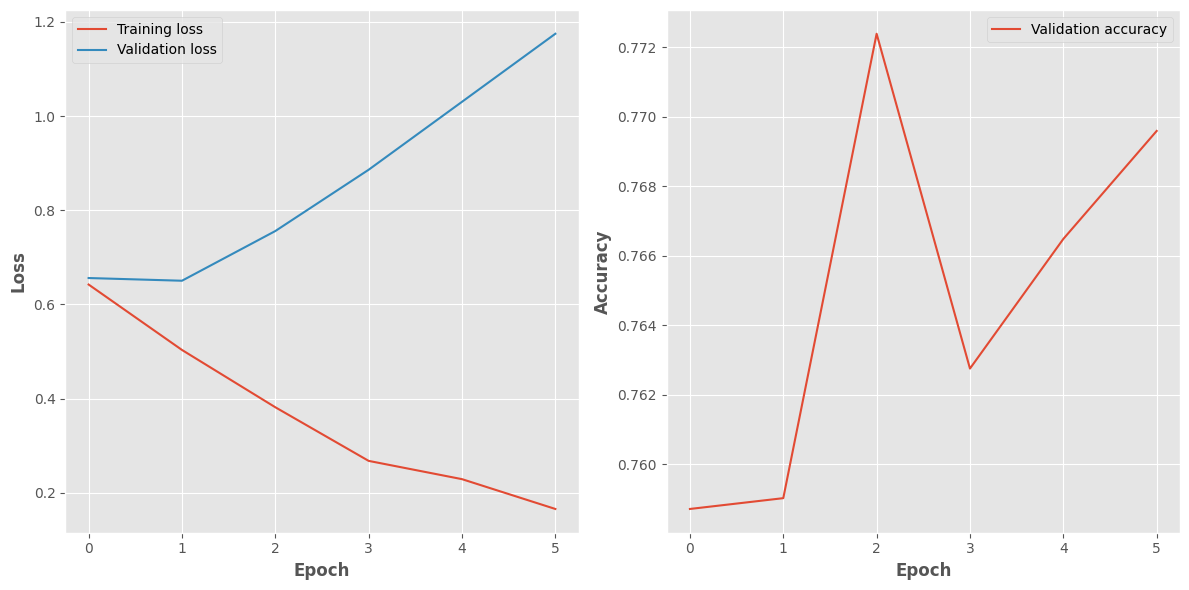

In [ ]:
import matplotlib.pyplot as plt

train_history = trainer.state.log_history

# Extract the training and evaluation loss

train_loss = []
eval_loss = []
eval_accuracy=[]

for i,x in enumerate(train_history):
  if i<(len(train_history)-1) and 'eval_loss' in train_history[i+1]:
    train_loss=train_loss+[x['loss']]
  if 'eval_loss' in x:
    eval_loss=eval_loss+[x['eval_loss']]

  


# Extract the evaluation accuracy
eval_accuracy = [x['eval_accuracy'] for x in train_history if 'eval_accuracy' in x]

# Create a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the loss curves in the first subplot
axs[0].plot(train_loss, label='Training loss')
axs[0].plot(eval_loss, label='Validation loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy curve in the second subplot
axs[1].plot(eval_accuracy, label='Validation accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Show the plot
plt.show()


In [ ]:
# evaluate the model on the test dataset
# if trainer.state.epochs:
#   result = trainer.evaluate(tokenized_datasets['test'])
#   print(f'evaulatuin loss : {result["eval_loss"]}  , evaluation accuracy:{result["eval_accuracy"]}')

#### loading pipeline

In [ ]:
from transformers import pipeline
newmodel=pipeline('sentiment-analysis',
                  model=os.path.join(PY_MODEL_DIR+'saved_camel_pytorch_model'),
                  tokenizer=os.path.join(PY_MODEL_DIR + "saved_camel_pytorch_tokenizer"),
                  device=0)

In [ ]:
newmodel('حب')

In [ ]:
loss, accuracy = model.evaluate(tokenized_datasets['test'], verbose=2)

In [ ]:
import evaluate
preds = model.predict(tokenized_datasets['test'])["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=tokenized_datasets["test"]["labels"])



## Transformers using Keras

> We will Fine-Tune Different Transformers on Different Datasets

### Loss Functions

> `SparseCategoricalCrossentropy` : is a loss function in Keras that is used for multi-class classification problems where the target labels are integers (sparse categorical labels) instead of one-hot encoded vectors. In other words, it is similar to CategoricalCrossentropy, but it can handle integer-encoded labels directly, without requiring them to be one-hot encoded.

> `BinaryCrossentropy`: This loss function is used when the labels are binary (i.e., 0 or 1). It calculates the cross-entropy loss between the true labels and the predicted probabilities.

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

MULTICLASS_LOSS=SparseCategoricalCrossentropy(from_logits=True)
BINARY_LOSS=BinaryCrossentropy(from_logits=True)

### Optimizers

>  `Adam`: optimizer is a popular optimization algorithm used for training deep neural networks. It is an adaptive learning rate optimization algorithm


> `Adagrad`: Adaptive Gradient optimizer is an adaptive learning rate optimization algorithm that modifies the learning rate of each weight based on the historical gradients of that weight.

> `RMSprop`: Root Mean Square Propagation optimizer is another adaptive learning rate optimization algorithm that modifies the learning rate of each weight based on the historical gradients of that weight, but with a different update rule than Adagrad.

> `Adadelta`: Adaptive Delta optimizer is another adaptive learning rate optimization algorithm that can automatically adapt the learning rate of each weight based on the gradients and update rules of the previous iterations.**bold text**

In [ ]:
from tensorflow.keras.optimizers import Adamax, SGD, RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#NUM_TRAIN_STEPS=len(tf_train_dataset)*EPOCHS
# i went and read it
NUM_TRAIN_STEPS=45 * EPOCHS

INTIAL_LEARNING_RATE = 5e-5

lr_schedule = ExponentialDecay(
    INTIAL_LEARNING_RATE, decay_steps=NUM_TRAIN_STEPS, decay_rate=0.96, staircase=True
)


# Create an Adamax(legacy version) optimizer with a custom learning rate
ADAM_OPTIMIZER = Adamax(learning_rate=lr_schedule)

# Create an SGDoptimizer with a custom learning rate
SGD_OPTIMIZER = SGD(learning_rate=lr_schedule)
RMSprop_OPTIMIZER = RMSprop(learning_rate=lr_schedule)

### Callbacks


> `Checkpoints` : Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard , EarlyStopping
import datetime


# Define the EarlyStopping callback
EARLYSTOP_CALLBACK = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# Name of the checkpoint files
checkpoint_prefix = os.path.join(TF_CHECKPOINT_DIR, "ckpt_{epoch}")



# define the ModelCheckpoint callback
SAVE_CHECKPOINT_CALLBACK = ModelCheckpoint(filepath=checkpoint_prefix, 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='max', 
                             verbose=2)


# Create a TensorBoard callback
log_dir=TF_LOG_DIR+"logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
TENSORBOARD_CALLBACK = TensorBoard(log_dir=log_dir, histogram_freq=1)



TF_CALLBACKS=[SAVE_CHECKPOINT_CALLBACK,TENSORBOARD_CALLBACK,EARLYSTOP_CALLBACK]




### Metrics for model.compile()

In [ ]:
from keras.metrics import BinaryAccuracy,Precision,Recall,AUC,SparseCategoricalAccuracy
METRICS = [
      SparseCategoricalAccuracy(name='accuracy'),
]

### Visualization

> `Accuracy`

> `Loss`

> `roc_curve`

In [ ]:
def plot_accuracy(model):
  """
  plots the model accuracy across Epochs on Training & Validation Dataset
  """
  plt.plot(model.history['accuracy'],label='accuracy')
  plt.plot(model.history['val_accuracy'],label='val_accuracy')
  plt.legend()
  plt.show()

def plot_history(history):
  """ 
  plots the model accuracy and loss across Epochs on Training & Validation Dataset
  """
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(1,len(accuracy) + 1)
    
  # Plot accuracy  
  plt.figure(1)
  plt.plot(epochs, accuracy, 'b', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
    
  # Plot loss
  plt.figure(2)
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_roc(y_test, y_pred, model_name):
  """
  Plots the ROC curve for the model's predictions on the test dataset
  """
  fpr, tpr, thr = roc_curve(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.plot(fpr, tpr, 'k-')
  ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
  ax.grid(True)
  ax.set(title='ROC Curve for {} on diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
  

In [ ]:
import tensorflow as tf

# Clear the TensorFlow session
tf.keras.backend.clear_session()

# Reset TensorFlow variables to their default values
# tf.compat.v1.reset_default_graph()

# # Clear GPU memory (if using a GPU)
# tf.compat.v1.keras.backend.clear_session()

### CAMEL BERT fine-tuned already on SA

> it is already fine-tuned on 3 Sentiments:
```
 label2id : {
   "negative": 1,
   "neutral": 2,
   "positive": 0 
   }
``` 


> For the fine-tuning, they used the ASTD, ArSAS, and SemEval datasets.

>  Modern Standard Arabic (MSA), dialectal Arabic (DA), and classical Arabic (CA)

> Their fine-tuning procedure and the hyperparameters we used can be found in their [Papers](https://arxiv.org/abs/2103.06678)

In [ ]:
from datasets import load_dataset, load_metric
from transformers import AutoConfig,AutoTokenizer,TFAutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback
from keras.backend import clear_session # clears the current Keras session and frees up memory.
clear_session()
checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment'

#### My Preprocessed Labeled Dataset
> Consists of Egyptian and Modern Standard Arabic (MSA) .


> Label explaination :

```
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
   } **bold text**
```

In [ ]:
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
}

In [ ]:
# Dataset names 
TRAIN_DATASET_NAME='TRAIN_DATASET'
VALIDDATION_DATASET_NAME='VALIDATION_DATASET'
TEST_DATASET_NAME='TEST_DATASET'

data_files = {"train": f"{PREPROCESSED_MERGED_DATASET_DIR + TRAIN_DATASET_NAME}.csv",
              'validation':f'{PREPROCESSED_MERGED_DATASET_DIR+VALIDDATION_DATASET_NAME}.csv',
              "test": f"{PREPROCESSED_MERGED_DATASET_DIR +TEST_DATASET_NAME}.csv",
              }

In [ ]:
# To delete cached datasets
# import os

# cache_dir = "~/.cache/huggingface/datasets"
# os.system(f"rm -rf {cache_dir}/*")

In [ ]:
# Load the dataset
dataset=load_dataset( 'csv',data_files=data_files,name='dataset')

dataset

In [ ]:
# explore Features
dataset['train'].features

In [ ]:
pd.DataFrame(dataset['train']).sample(5)

In [ ]:
# # Evaluate the model
# loss, accuracy = model.evaluate(validation_dataset.batch(32), verbose=2)
# print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
# import evaluate
# validation_inputs = {
#     'input_ids': np.array(validation_encodings['input_ids']),
#     'attention_mask': np.array(validation_encodings['attention_mask']),
# }
# preds = model.predict( dict(validation_inputs))["logits"]
# class_preds = np.argmax(preds, axis=1)


# metric = evaluate.load("glue", "mrpc")
# metric.compute(predictions=class_preds, references=validation_df["label"])


#### Camel-BERT Subword Tokenization

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(example:Dict[str, Any]) -> Dict[str, Union[List[int], Any]]:
  """
  takes a dictionary (like the items of our dataset) 
  it does subword tokenization
  truncate to length 180
  we wont do padding here we will do it with DataCollator with Padding (for Bucket Batching)
  add special tokens
  convert tokens to ids
  @returns a new dictionary with the keys input_ids, attention_mask
  """
  return tokenizer(example["TWEET"], truncation=True,max_length=MAX_LEN )

In [ ]:
tokenized_datasets = dataset.map(tokenize_function,
                                 batched=True,
                                 remove_columns=['TWEET'],# columns will be removed before updating the examples with the output of `function`
                                 disable_nullable=True,
                                 num_proc=2
                                 )
tokenized_datasets

In [ ]:
# removing unecessary columns
#tokenized_datasets=tokenized_datasets.remove_columns(['token_type_ids'])
# tokenized_datasets = tokenized_datasets.cast("float32", column_names="label")
tokenized_datasets = tokenized_datasets.rename_column("LABEL", "labels")


# reformat it for tensorflow
tokenized_datasets=tokenized_datasets.with_format('tensorflow')
tokenized_datasets

#### Data Collator

> Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
    drop_remainder=True # Drop the last incomplete batch when loading. Ensures that all batches yielded by the dataset will have the same length
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
    drop_remainder=True # Drop the last incomplete batch when loading. Ensures that all batches yielded by the dataset will have the same length

)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
    drop_remainder=True # Drop the last incomplete batch when loading. Ensures that all batches yielded by the dataset will have the same length
)



tf_train_dataset,tf_validation_dataset,tf_test_dataset

#### Configuring the Model

In [ ]:
config=AutoConfig.from_pretrained(checkpoint , num_labels = 3)


config

In [ ]:

# Check if GPU is available and set it as the default device
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")



# Load the model
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)


# Check if the model is using GPU
print(tf.config.list_physical_devices('GPU'))

In [ ]:
# compile the model
model.compile(optimizer='adam',loss=MULTICLASS_LOSS,metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
# we need to know which index corresponds to which label
model.config.id2label

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=f'{FIGURES_DIR}{checkpoint}_model.png', show_shapes=True)

In [ ]:
TF_lATEST_EPOCH=0

checkpoint_path = os.path.join(TF_CHECKPOINT_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_CHECKPOINT_DIR):
    os.makedirs(TF_CHECKPOINT_DIR)
    print("Directory created successfully at", TF_CHECKPOINT_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


In [ ]:
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=EPOCHS, 
    callbacks=TF_CALLBACKS,
    verbose=1,
)

In [ ]:
!tensorboard --logdir logs/fit

In [ ]:
%%time
loss, accuracy = model.evaluate(tf_test_dataset, verbose=2)

In [ ]:
preds = model.predict(tf_validation_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=tf_test_dataset["validation"]["label"])

In [ ]:
save_path = os.path.join(TF_MODEL_DIR, f"_{checkpoint}")

# saving the model
model.save_pretrained(save_path)

In [ ]:
model.save_pretrained("saved_model")

#### Negative/Positive Labeled Dataset
> Modern Standard Arabic (MSA) or Jordanian dialect.

> Arabic Jordanian General Tweets (AJGT) Corpus consisted of 1,800 tweets annotated as positive and negative. 


> [Dataset](https://huggingface.co/datasets/ajgt_twitter_ar)

#### Label explaination :

> `0`: Negative

> `1`: Positive

In [ ]:
dataset_name='ajgt_twitter_ar'

In [ ]:
# Load the dataset
dataset=load_dataset(dataset_name,split={
    'train': 'train[:80%]',
    'validation': 'train[80%:90%]',
    'test': 'train[90%:]'
})

dataset

In [ ]:
# explore Features
dataset['train'].features

In [ ]:
pd.DataFrame(dataset['train']).sample(5)

In [ ]:
# # Evaluate the model
# loss, accuracy = model.evaluate(validation_dataset.batch(32), verbose=2)
# print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
# import evaluate
# validation_inputs = {
#     'input_ids': np.array(validation_encodings['input_ids']),
#     'attention_mask': np.array(validation_encodings['attention_mask']),
# }
# preds = model.predict( dict(validation_inputs))["logits"]
# class_preds = np.argmax(preds, axis=1)


# metric = evaluate.load("glue", "mrpc")
# metric.compute(predictions=class_preds, references=validation_df["label"])


##### Camel-BERT Subword Tokenization

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(example:Dict[str, Any]) -> Dict[str, Union[List[int], Any]]:
  """
  takes a dictionary (like the items of our dataset) 
  it does subword tokenization
  truncate to length 180
  we wont do padding here we will do it with DataCollator with Padding (for Bucket Batching)
  add special tokens
  convert tokens to ids
  @returns a new dictionary with the keys input_ids, attention_mask
  """
  if example["label"] == 0:
     example["label"] =1
  if example["label"] == 1:
    example["label"] =0


  return tokenizer(example["text"], truncation=True,max_length=MAX_LEN )

In [ ]:
tokenized_datasets = dataset.map(tokenize_function,
                                 batched=True,
                                 remove_columns=['text'],# columns will be removed before updating the examples with the output of `function`
                                 disable_nullable=True,
                                 num_proc=2
                                 )
tokenized_datasets

In [ ]:
# removing unecessary columns
#tokenized_datasets=tokenized_datasets.remove_columns(['token_type_ids'])
# tokenized_datasets = tokenized_datasets.cast("float32", column_names="label")


# reformat it for tensorflow
tokenized_datasets=tokenized_datasets.with_format('tensorflow')
tokenized_datasets

##### Data Collator

> Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
    drop_remainder=True # Drop the last incomplete batch when loading. Ensures that all batches yielded by the dataset will have the same length
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids",'token_type_ids'],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=BATCH_SIZE,
)

tf_train_dataset,tf_validation_dataset,tf_test_dataset

##### Configuring the Model

In [ ]:
config=AutoConfig.from_pretrained(checkpoint,num_labels=3)

# config.id2label={0:'NEGATIVE',1:'POSITIVE',3:''}
# config.label2id={'NEGATIVE':0,'POSITIVE':1}
config

In [ ]:
# to get output of TFAutoModel linked to our classification problem we need a head

model=TFAutoModelForSequenceClassification.from_pretrained(checkpoint,config=config)

model.compile(optimizer=ADAM_OPTIMIZER,loss=MULTICLASS_LOSS,metrics=METRICS)

In [ ]:
# we need to know which index corresponds to which label
model.config.id2label

In [ ]:
TF_lATEST_EPOCH=0

checkpoint_path = os.path.join(TF_CHECKPOINT_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_CHECKPOINT_DIR):
    os.makedirs(TF_CHECKPOINT_DIR)
    print("Directory created successfully at", TF_CHECKPOINT_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


In [ ]:
%%time
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=EPOCHS,
    callbacks=CALLBACKS,
    verbose=2,
    initial_epoch=TF_lATEST_EPOCH
)

In [ ]:
loss, accuracy = model.evaluate(tf_test_dataset, verbose=2)

In [ ]:
preds = model.predict(tf_validation_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=tf_test_dataset["validation"]["label"])

In [ ]:
save_path = os.path.join(TF_MODEL_DIR, f"_{checkpoint}")

# saving the model
model.save_pretrained(save_path)

##### Configuring the Model

In [ ]:
config=AutoConfig.from_pretrained(checkpoint,num_labels=2)

# config.id2label={0:'NEGATIVE',1:'POSITIVE',3:''}
# config.label2id={'NEGATIVE':0,'POSITIVE':1}

In [ ]:
# from transformers import TFBertForSequenceClassification,TFAutoModel,TFBertModel

# # Load the pre-trained BERT model
# pretrained_model = TFBertModel.from_pretrained("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")

# # Add a new output layer with 2 units
# output_layer = tf.keras.layers.Dense(units=1, activation="softmax")(pretrained_model.pooler_output)

# # Create a new model with the modified output layer
# model = tf.keras.models.Model(inputs=pretrained_model.input, outputs=output_layer)

# # Compile the model with the desired optimizer, loss, and metrics
# model.compile(optimizer=ADAM_OPTIMIZER,loss=MULTICLASS_LOSS,metrics=METRICS)

# # Train only the new output layer
# model.fit(tf_train_dataset,
#           validation_data=tf_validation_dataset,
#           epochs=10)


In [ ]:
# from torchinfo import summary
# summary(model)

In [ ]:
checkpoint_path = "./training_checkpoints/ckpt_5"

model.load_weights(checkpoint_path)



In [ ]:
%%time
last_epoch=1
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=10,
    callbacks=CALLBACKS,
    verbose=2,
    initial_epoch=last_epoch
)

In [ ]:
loss, accuracy = model.evaluate(tf_test_dataset, verbose=2)

In [ ]:
import tensorflow as tf 
predictions=tf.math.softmax(outputs.logits,axis=-1)
print(predictions)

In [ ]:
# we need to know which index corresponds to which label
model.config.id2label

In [ ]:
model.save_pretrained("saved_model")

In [ ]:

new_model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=EPOCHS,
    callbacks=CALLBACKS,
    verbose=2
)

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)


In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

batch_size = 8
num_epochs = 3
# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=opt,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


In [ ]:
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=3,
    verbose=2
)

In [ ]:
import evaluate
preds = model.predict(tf_validation_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=raw_datasets["validation"]["label"])

